# Figure that explains how the blending parameters affect the sigmoid

In [16]:
import matplotlib.pylab as plt
import numpy as np

In [17]:
def Weight(phi,A=5, phi_o=0):
    return 1-(0.5*np.tanh(A*((np.abs(phi)-phi_o)))+0.5)

def annot_max(x,y, ax=None):
    x=np.array(x)
    y=np.array(y) 
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

def plotweighting(philist, A, delta, phi_o, enumeration,color):
    label=enumeration
    plt.plot(philist,[Weight(phi, A = A, phi_o = phi_o) for phi in philist], label = label,color=color)

In [18]:
from palettable.scientific.sequential import GrayC_20_r
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

cmapCurve = ListedColormap(GrayC_20_r.mpl_colors[7:])
cmap = LinearSegmentedColormap.from_list("cont",GrayC_20_r.mpl_colors[11:])
#cmap = ListedColormap(GrayC_20_r.mpl_colors[10:])
#cmap = ListedColormap(GrayC_20_r.mpl_colors[5:])

In [19]:
def PlotLineVariation(delta,A_factor,phi_o_factor,p = 3,**kwargs):
    A = A_factor*p/delta
    phi_o = delta*phi_o_factor
    
    philist=np.arange(-(delta),(delta),.5).tolist()
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    plotweighting(philist, A,  delta, phi_o,"$\omega(\phi,\phi_o,A)$",cmapCurve.colors[0])
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    AnnotatePhi_o = kwargs.get("AnnotatePhi_o",False)
    AnnotateA = kwargs.get("AnnotateA",False)
    if AnnotatePhi_o:
        plt.text(phi_o+0.04*delta,0.3,'$\phi_o={}\delta$'.format(phi_o_factor),rotation=-60,fontsize='small')
    if AnnotateA:
        plt.text(phi_o*1.0-1/(1.5*A),0.75+np.log(A_factor)/15,'$A={}p/\delta$'.format(A_factor),rotation=-30,fontsize='small',horizontalalignment='center')

def BackgroundNPlotFormat(delta):
    
    philist=np.arange(-(delta),(delta),.5).tolist()
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    N = 10000
    X, Y = np.mgrid[-delta:delta:complex(0, N), 0:1:complex(0, 5)]
    Z = np.abs(X) 
    
    img = plt.pcolormesh(X, Y, Z, cmap=cmap)
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    TitleText = r"$\delta$ = {delta}m".format(delta=delta)
    plt.axvline([delta],c="k",ls=":");plt.axvline([-delta],c="k",ls=":");
    plt.text(delta*(0.97),0.95,TitleText,rotation=90)
    plt.axvline([0],c="k",ls="--");

    

    plt.xlabel("$\phi(x)$")
    plt.grid()
    plt.xticks(np.arange(-delta , delta , 10))
    plt.ylabel("$\omega(\phi,\phi_o,A)$",fontsize='large')
    

    #plt.legend(title=TitleText,loc='lower left')
    return img


def BackgroundNPlotFormatNoLAbs(delta):
    
    philist=np.arange(-(delta),(delta),.5).tolist()
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    N = 10000
    X, Y = np.mgrid[-delta:delta:complex(0, N), 0:1:complex(0, 5)]
    Z = np.abs(X) 
    
    img = plt.pcolormesh(X, Y, Z, cmap=cmap)
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    TitleText = r"$\delta$ = {delta}m".format(delta=delta)
    plt.axvline([delta],c="k",ls=":");plt.axvline([-delta],c="k",ls=":");
    plt.text(delta*(0.9),0.50,"$\phi=\delta$",rotation=90)

    plt.axvline([0],c="k",ls="--");
    plt.text(-0.1*delta,0.50,"$\phi=0$",rotation=90)
    

    plt.xlabel("$|\phi(x)|$")
    #plt.grid()
    plt.xticks(np.arange(-delta , delta , 5))
    

    #plt.legend(title=TitleText,loc='lower left')
    return img

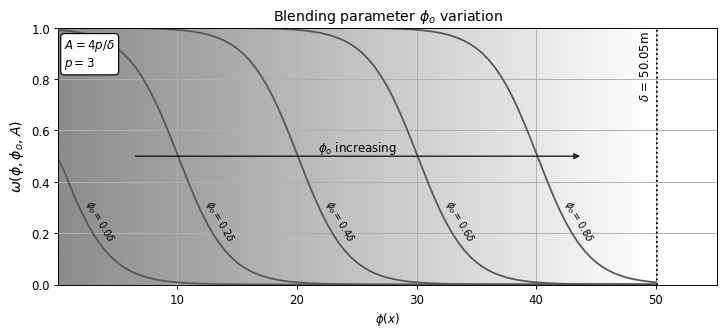

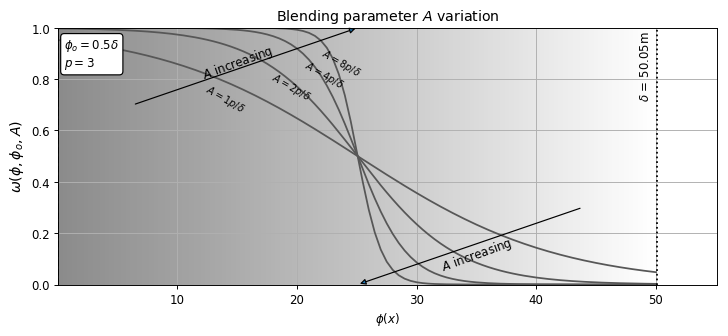

In [20]:
bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
plt.figure(figsize= [10, 4],dpi=85)

delta = 50.05;

PlotLineVariation(delta, A_factor=4, phi_o_factor=0.0, p = 3, AnnotatePhi_o=True)
PlotLineVariation(delta, A_factor=4, phi_o_factor=0.2, p = 3, AnnotatePhi_o=True)
PlotLineVariation(delta, A_factor=4, phi_o_factor=0.4, p = 3, AnnotatePhi_o=True)
PlotLineVariation(delta, A_factor=4, phi_o_factor=0.6, p = 3, AnnotatePhi_o=True)
PlotLineVariation(delta, A_factor=4, phi_o_factor=0.8, p = 3, AnnotatePhi_o=True)


BoxAnnotation ="""$A=4p/\delta$
$p=3$"""
plt.text(delta*(0.01), 0.85, BoxAnnotation, color='black', bbox=bbox)

plt.annotate("", xy=(delta*7/8, 0.5), xycoords='data', xytext=(delta/8, 0.5), arrowprops=dict(arrowstyle='-|>'))
plt.annotate("$\phi_o$ increasing", xy=(delta/2, 0.52), xycoords='data',horizontalalignment='center')



BackgroundNPlotFormat(delta)
plt.title("Blending parameter $\phi_o$ variation")
plt.xlim(0,delta+5)
plt.show()

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

plt.figure(figsize= [10, 4],dpi=85)
delta = 50.05;
PlotLineVariation(delta, A_factor=1, phi_o_factor=0.5, p = 3, AnnotateA=True)
PlotLineVariation(delta, A_factor=2, phi_o_factor=0.5, p = 3, AnnotateA=True)
PlotLineVariation(delta, A_factor=4, phi_o_factor=0.5, p = 3, AnnotateA=True)
PlotLineVariation(delta, A_factor=8, phi_o_factor=0.5, p = 3, AnnotateA=True)

BoxAnnotation ="""$\phi_o=0.5\delta$
$p=3$"""
plt.text(delta*(0.01), 0.85, BoxAnnotation, color='black', bbox=bbox)

plt.annotate("", xy=(delta*1/2, 1), xycoords='data', xytext=(delta/8, 0.7), arrowprops=dict(arrowstyle='-|>'))
plt.annotate("$A$ increasing", xy=(delta*1.5/5, 0.90), xycoords='data',horizontalalignment='center',rotation=20)

plt.annotate("", xy=(delta*1/2, 0), xycoords='data', xytext=(delta*7/8, 1-0.7), arrowprops=dict(arrowstyle='-|>'))
plt.annotate("$A$ increasing", xy=(delta*3.5/5, 0.15), xycoords='data',horizontalalignment='center',rotation=20)

BackgroundNPlotFormat(delta)
plt.title("Blending parameter $A$ variation")
plt.xlim(0,delta+5)
plt.show()



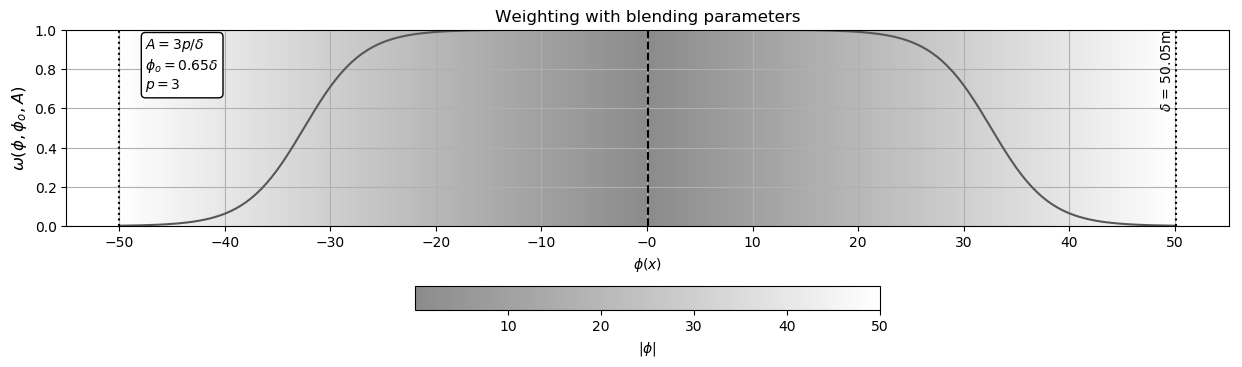

In [21]:
bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
fig = plt.figure(figsize= [15, 4],dpi=100)

delta = 50.05;

PlotLineVariation(delta, A_factor=3, phi_o_factor=0.65, p = 3)


BoxAnnotation ="""$A=3p/\delta$
$\phi_o = 0.65\delta$
$p=3$"""
plt.text(-delta*(.95), 0.70, BoxAnnotation, color='black', bbox=bbox)


img= BackgroundNPlotFormat(delta)
plt.title("Weighting with blending parameters")
plt.xlim(-delta-5,delta+5)

cbar = fig.colorbar(img, shrink=.4,orientation="horizontal", pad = 0.2)
cbar.ax.set_xlabel("$|\phi|$")

plt.show()


/home/nico/miniconda3/envs/jane/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


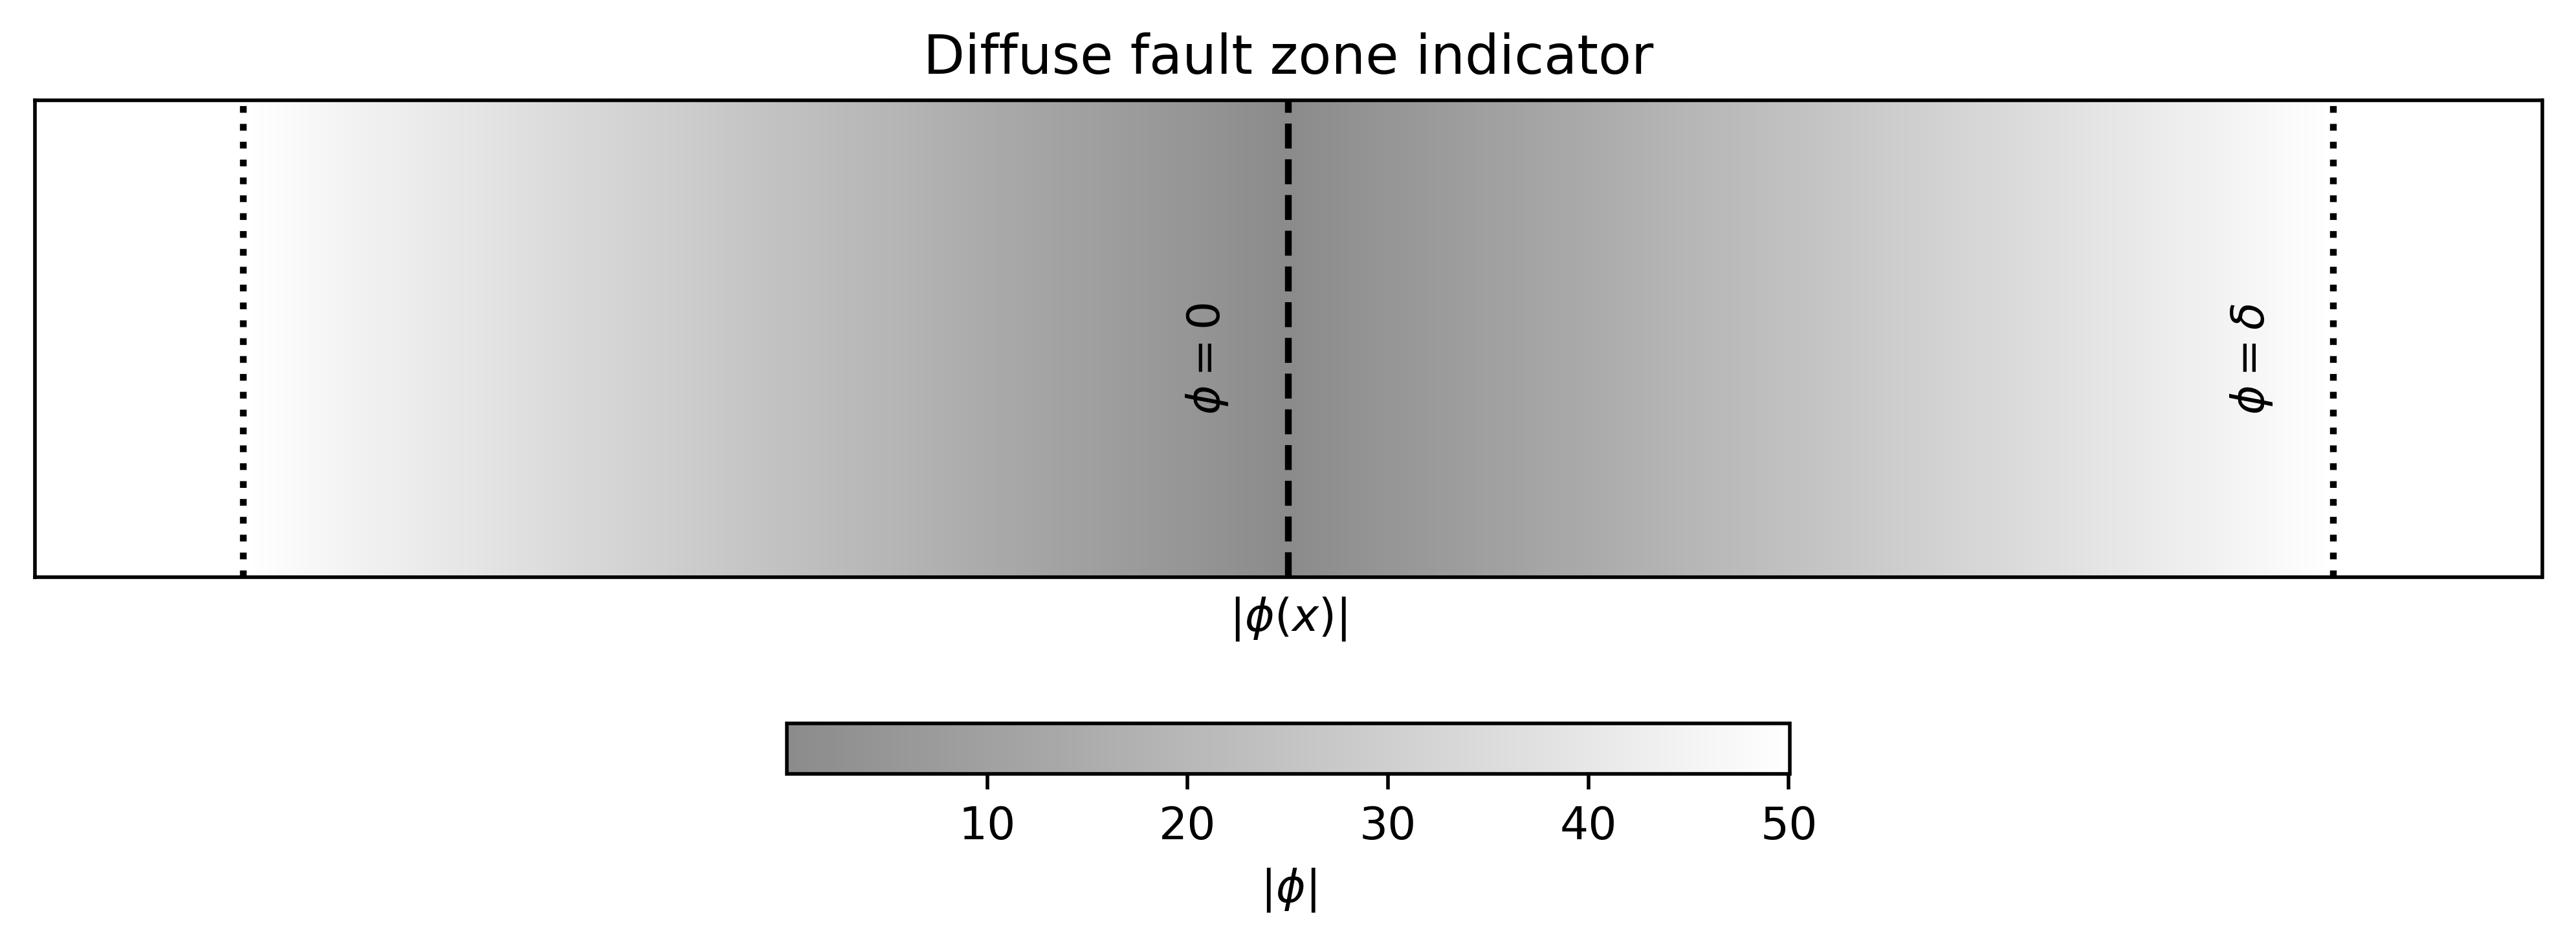

In [22]:
bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
fig= plt.figure(figsize= [10, 3],dpi=500)

delta = 50.05;

img = BackgroundNPlotFormatNoLAbs(delta)
plt.title("Diffuse fault zone indicator",backgroundcolor= 'white',zorder = -1)
plt.xlim(-delta-10,delta+10)

cbar = fig.colorbar(img, shrink=.4,orientation="horizontal", pad = 0.2)
cbar.ax.set_xlabel("$|\phi|$")

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', 
    top='off', 
    labelbottom='off', 
    right='off', 
    left='off', 
    labelleft='off') # labels along the bottom edge are off

plt.show()

/home/nico/miniconda3/envs/jane/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


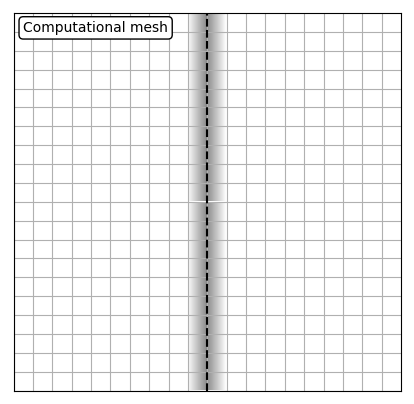

In [23]:
bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
fig= plt.figure(figsize= [5, 5],dpi=100)

delta = 50.05;

philist=np.arange(-(delta),(delta),.5).tolist()
    
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
N = 10000
X, Y = np.mgrid[-delta:delta:complex(0, N), -500:500:complex(0, 5)]
Z = np.abs(X) 

img = plt.pcolormesh(X, Y, Z, cmap=cmap)
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

plt.axvline([0],c="k",ls="--");


plt.xlim([-500,500])
plt.grid()
plt.xticks(np.arange(-500 , 500 , 50))
plt.yticks(np.arange(-500 , 500 , 50))


BoxAnnotation ="""Computational mesh"""
plt.text(-500*(.95), 450, BoxAnnotation, color='black', bbox=bbox)

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', 
    top='off', 
    labelbottom='off', 
    right='off', 
    left='off', 
    labelleft='off') # labels along the bottom edge are off
plt.show()